In [1]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
# Load data into Pandas dataframe
medical_df= pd.read_csv("/Users/lmilam/Downloads/e9d8sm5uf8df75k650df/medical_raw_data.csv")

In [3]:
# Display medical dataframe
medical_df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,...,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9996,9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,...,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9997,9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,...,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9998,9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,...,8462.831883,7781.678412,5,5,3,4,4,3,4,3


In [4]:
# List of Dataframe fields
df = medical_df.columns
print(df)

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [5]:
# Remove redundant "Unnamed: 0" field in the first column
df = medical_df.drop(columns ='Unnamed: 0', axis =1)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [6]:
# Rename survey columns to more identifiable names
df = df.rename(
    {'Item1':'Survey_TimelyAdmin',
     'Item2':'Survey_TimelyTreatment',
    'Item3':'Survey_TimelyVisits',
     'Item4':'Survey_Reliability',
     'Item5':'Survey_Options',
     'Item6':'Survey_HoursTreatment',
     'Item7':'Survey_CourteousStaff',
     'Item8':'Survey_ActiveListening'}, axis=1)

In [7]:
# Find the number of rows and columns of dataset
df.shape

(10000, 52)

In [8]:
# Describe medical dataset stats
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,...,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,...,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,...,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,...,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,...,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,...,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,...,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [9]:
# Reseting index
df.index = np.arange(1, len(df) + 1)

In [10]:
# Remove less relevant fields from stats description
df_stats = df.drop(columns =['CaseOrder','Customer_id','Interaction','UID','Job','Marital'])
df_stats.head()

,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Children,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
1,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,1.0,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,3.0,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,3.0,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,0.0,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,NaN,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [11]:
# Review data types in dataset
df.dtypes

CaseOrder                   int64
Customer_id                object
Interaction                object
UID                        object
City                       object
State                      object
County                     object
Zip                         int64
Lat                       float64
Lng                       float64
Population                  int64
Area                       object
Timezone                   object
Job                        object
Children                  float64
Age                       float64
Education                  object
Employment                 object
Income                    float64
Marital                    object
Gender                     object
ReAdmis                    object
VitD_levels               float64
Doc_visits                  int64
Full_meals_eaten            int64
VitD_supp                   int64
Soft_drink                 object
Initial_admin              object
HighBlood                  object
Stroke        

In [12]:
# Re-validate column data types and missing values
df.columns.to_series().groupby(df_stats.dtypes).groups

{int64: ['Zip', 'Population', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Survey_TimelyAdmin', 'Survey_TimelyTreatment', 'Survey_TimelyVisits', 'Survey_Reliability', 'Survey_Options', 'Survey_HoursTreatment', 'Survey_CourteousStaff', 'Survey_ActiveListening'], float64: ['Lat', 'Lng', 'Children', 'Age', 'Income', 'VitD_levels', 'Overweight', 'Anxiety', 'Initial_days', 'TotalCharge', 'Additional_charges'], object: ['City', 'State', 'County', 'Area', 'Timezone', 'Education', 'Employment', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services']}

In [13]:
# Find missing values
df.isnull()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Locate rows from dataset containing missing values
df.isnull().any(axis=1)

1         True
2         True
3         True
4         True
5         True
         ...  
9996      True
9997     False
9998      True
9999     False
10000     True
Length: 10000, dtype: bool

In [15]:
# Display columns with NAs
df.isna().any()

CaseOrder                 False
Customer_id               False
Interaction               False
UID                       False
City                      False
State                     False
County                    False
Zip                       False
Lat                       False
Lng                       False
Population                False
Area                      False
Timezone                  False
Job                       False
Children                   True
Age                        True
Education                 False
Employment                False
Income                     True
Marital                   False
Gender                    False
ReAdmis                   False
VitD_levels               False
Doc_visits                False
Full_meals_eaten          False
VitD_supp                 False
Soft_drink                 True
Initial_admin             False
HighBlood                 False
Stroke                    False
Complication_risk         False
Overweig

In [16]:
# Count of missing values by column
data_nulls = df.isnull().sum()
print(data_nulls)

CaseOrder                    0
Customer_id                  0
Interaction                  0
UID                          0
City                         0
State                        0
County                       0
Zip                          0
Lat                          0
Lng                          0
Population                   0
Area                         0
Timezone                     0
Job                          0
Children                  2588
Age                       2414
Education                    0
Employment                   0
Income                    2464
Marital                      0
Gender                       0
ReAdmis                      0
VitD_levels                  0
Doc_visits                   0
Full_meals_eaten             0
VitD_supp                    0
Soft_drink                2467
Initial_admin                0
HighBlood                    0
Stroke                       0
Complication_risk            0
Overweight                 982
Arthriti

In [17]:
# Store rows with missing values in new variable
rows_with_missing_values = df.isnull().any(axis=1)
df[rows_with_missing_values]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,9987,Z630066,1ed0ed27-4965-4252-85ea-dd7ed73bd51a,f132eca4af3b1c955d89a213096ef88a,Perry,IA,Dallas,50220,41.83609,-94.12296,...,6476.178435,15591.407940,3,3,3,3,4,4,4,3
9991,9991,M07341,9b73f4cb-3945-41c1-9a38-129fcecde3a0,4f83c32e349fa29482f338ed25896f01,Crosby,MS,Wilkinson,39633,31.29102,-91.18493,...,6900.208499,11365.374050,3,4,4,4,4,4,3,3
9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,7725.953391,15281.214660,3,3,3,4,4,2,3,2


In [18]:
# Rows that have any duplicates within the dataset
data_duplicates = df.loc[df.duplicated()]
print(data_duplicates)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Survey_TimelyAdmin, Survey_TimelyTreatment, Survey_TimelyVisits, Survey_Reliability, Survey_Options, Survey_HoursTreatment, Survey_CourteousStaff, Survey_ActiveListening]
Index: []

[0 rows x 52 columns]


In [19]:
# Calculate the standard deviation of the numeric fields 
data_std = df_stats.std()
print(data_std)

Zip                       27469.588208
Lat                           5.403085
Lng                          15.205998
Population                14824.758614
Children                      2.155427
Age                          20.659182
Income                    28664.861050
VitD_levels                   6.723277
Doc_visits                    1.045734
Full_meals_eaten              1.008117
VitD_supp                     0.628505
Overweight                    0.454186
Anxiety                       0.467389
Initial_days                 26.287050
TotalCharge                3377.558136
Additional_charges         6542.601544
Survey_TimelyAdmin            1.031966
Survey_TimelyTreatment        1.034825
Survey_TimelyVisits           1.032755
Survey_Reliability            1.036282
Survey_Options                1.030192
Survey_HoursTreatment         1.032376
Survey_CourteousStaff         1.021405
Survey_ActiveListening        1.042312
dtype: float64


In [20]:
# Impute missing values for Age, Income, Overweight and Initial days with the mean of the field
# Then print count of null values now
df_stats['Age'] = df['Age'].fillna(df['Age'].mean())
df_stats['Income'] = df['Income'].fillna(df['Income'].mean())
df_stats['Overweight'] = df['Overweight'].fillna(df['Overweight'].mean())
df_stats['Initial_days'] = df['Initial_days'].fillna(df['Initial_days'].mean())
data = df_stats.isnull().sum()
print(data)

City                         0
State                        0
County                       0
Zip                          0
Lat                          0
Lng                          0
Population                   0
Area                         0
Timezone                     0
Children                  2588
Age                          0
Education                    0
Employment                   0
Income                       0
Gender                       0
ReAdmis                      0
VitD_levels                  0
Doc_visits                   0
Full_meals_eaten             0
VitD_supp                    0
Soft_drink                2467
Initial_admin                0
HighBlood                    0
Stroke                       0
Complication_risk            0
Overweight                   0
Arthritis                    0
Diabetes                     0
Hyperlipidemia               0
BackPain                     0
Anxiety                    984
Allergic_rhinitis            0
Reflux_e

In [21]:
# Impute missing values for Soft drink, Children, and Anxiety
# Then print count of null values
df_stats['Soft_drink'] = df_stats['Soft_drink'].fillna('No')
df_stats['Children'] = df_stats['Children'].fillna(0)
df_stats['Anxiety'] = df_stats['Anxiety'].fillna(0)
data = df_stats.isnull().sum()
print(data)

City                      0
State                     0
County                    0
Zip                       0
Lat                       0
Lng                       0
Population                0
Area                      0
Timezone                  0
Children                  0
Age                       0
Education                 0
Employment                0
Income                    0
Gender                    0
ReAdmis                   0
VitD_levels               0
Doc_visits                0
Full_meals_eaten          0
VitD_supp                 0
Soft_drink                0
Initial_admin             0
HighBlood                 0
Stroke                    0
Complication_risk         0
Overweight                0
Arthritis                 0
Diabetes                  0
Hyperlipidemia            0
BackPain                  0
Anxiety                   0
Allergic_rhinitis         0
Reflux_esophagitis        0
Asthma                    0
Services                  0
Initial_days        

In [22]:
# Extract clean dataset
df_stats.to_csv('medical_clean.csv')

In [23]:
# Re-express categorical data as numeric data
data = df_stats['State']
state_dict = {
    "AL" : 1, "AK" : 2, "AZ" : 3, "AR" : 4, "CA" : 5, "CO" : 6, "CT" : 7, "DE" : 8, "DC" : 9, "FL" : 10, 
  "GA" : 11, "HI" : 12, "ID" : 13, "IL" : 14, "IN" : 15, "IA" : 16, "KS" : 17, "KY" : 18, "LA" : 19, "ME" : 20, 
  "MD" : 21, "MA" : 22, "MI" : 23, "MN" : 24, "MS" : 25, "MO" : 26, "MT" : 27, "NE" : 28, "NV" : 29, "NH" : 30, 
  "NJ" : 31, "NM" : 32, "NY" : 33, "NC" : 34, "ND" : 35, "OH" : 36, "OK" : 37, "OR" : 38, "PA" : 39, "PR" : 40,
  "RI" : 41, "SC" : 42, "SD" : 43, "TN" : 44, "TX" : 45, "UT" : 46, "VT" : 47, "VA" : 48, "WA" : 49, "WV" : 50,
  "WI" : 51, "WY" : 52
}
for k,v in state_dict.items():
    data = data.replace(k,v)

df_stats['State'] = data

In [24]:
data = df_stats['Area']
area_dict = {
   "Rural":1, "Suburban":2, "Urban":3
}
for k,v in area_dict.items():
    data = data.replace(k,v)

df_stats['Area'] = data

In [25]:
data = df_stats['Timezone']
timezone_dict = {
  "America/Puerto_Rico" : -4,
  "America/Detroit" : -5,
  "America/Indiana/Indianapolis" : -5,
  "America/Indiana/Marengo" : -5,
  "America/Indiana/Vincennes" : -5,
  "America/Indiana/Vevay" : -5,
  "America/Indiana/Winamac" : -5,
  "America/Kentucky/Louisville" : -5,
  "America/New_York" : -5,
  "America/Toronto" : -5,
  "America/Chicago" : -6,
  "America/Indiana/Knox" : -6,
  "America/Indiana/Tell_City" : -6,
  "America/Menominee" : -6,
  "America/North_Dakota/Beulah" : -6,
  "America/North_Dakota/New_Salem" : -6,
  "America/Boise" : -7,
  "America/Denver" : -7,
  "America/Phoenix" : -7,
  "America/Los_Angeles" : -8,
  "America/Anchorage" : -9,
  "America/Nome" : -9,
  "America/Sitka" : -9,
  "America/Yakutat" : -9,
  "America/Adak" : -10,
  "Pacific/Honolulu" : -10
}
for k,v in timezone_dict.items():
    data = data.replace(k,v)
    
df_stats['Timezone'] = data

In [26]:
data = df_stats['Education']
education_dict = {
 "No Schooling Completed" : 0,
  "Nursery School to 8th Grade" : 8,
  "9th Grade to 12th Grade, No Diploma" : 12,
  "GED or Alternative Credential" : 12,
  "Regular High School Diploma" : 12,
  "Some College, Less than 1 Year" : 13,
  "Some College, 1 or More Years, No Degree" : 14,
  "Associate's Degree" : 15,
  "Bachelor's Degree" : 16,
  "Master's Degree" : 18,
  "Professional School Degree" : 20,
  "Doctorate Degree" : 24}
for k,v in education_dict.items():
    data = data.replace(k,v)

df_stats['Education'] = data

In [27]:
data = df_stats['ReAdmis']
readmis_dict = {
    "No":0,"Yes":1
}
for k,v in readmis_dict.items():
    data = data.replace(k,v)
    
df_stats['ReAdmis'] = data

In [28]:
data = df_stats['Soft_drink']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
    
df_stats['Soft_drink'] = data

In [29]:
data = df_stats['HighBlood']
for k,v in readmis_dict.items():
    data = data.replace(k,v)

df_stats['HighBlood'] = data

In [30]:
data = df_stats['Stroke']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
df_stats['Stroke'] = data

In [31]:
data = df_stats['Complication_risk']
CompRisk_dict = {
    "Low":1,"Medium":2,"High":3
}
for k,v in CompRisk_dict.items():
    data = data.replace(k,v)
    
df_stats['Complication_risk'] = data

In [32]:
data = df_stats['Arthritis']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
df_stats['Arthritis'] = data

In [33]:
data = df_stats['Diabetes']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
df_stats['Diabetes'] = data

In [34]:
data = df_stats['Hyperlipidemia']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
df_stats['Hyperlipidemia'] = data

In [35]:
data = df_stats['BackPain']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
df_stats['BackPain'] = data

In [36]:
data = df_stats['Allergic_rhinitis']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
df_stats['Allergic_rhinitis'] = data

In [37]:
data = df_stats['Reflux_esophagitis']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
df_stats['Reflux_esophagitis'] = data

In [38]:
data = df_stats['Asthma']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
df_stats['Asthma'] = data

In [39]:
data = df_stats['Services']
services_dict = {
    "Blood Work":1,"Intravenous":2,"CT Scan":3,"MRI":4
}
for k,v in services_dict.items():
    data = data.replace(k,v)
    
df_stats['Services'] = data

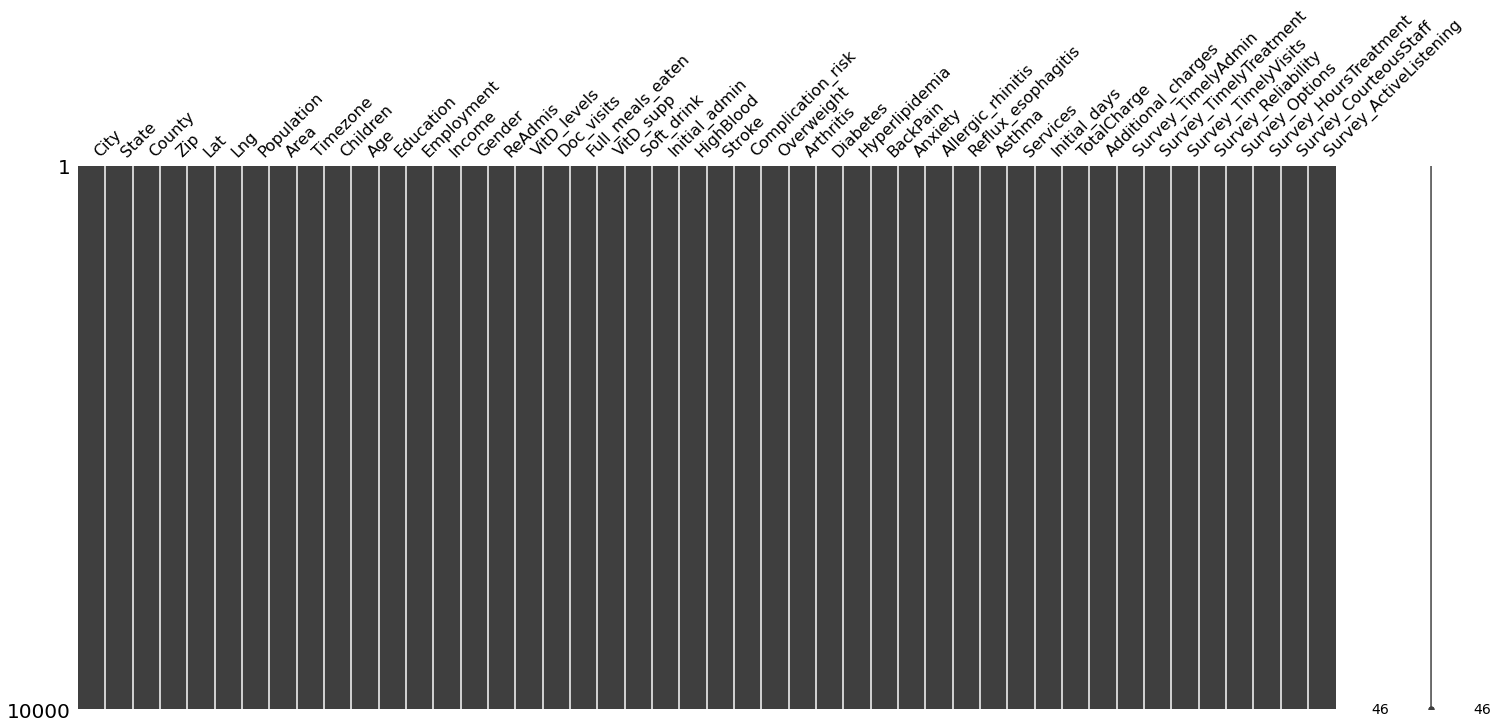

In [40]:
# Use MICE to identify missing values
mice = msno.matrix(df_stats)

/opt/anaconda3/lib/python3.8/site-packages/missingno/missingno.py:265: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<AxesSubplot:>

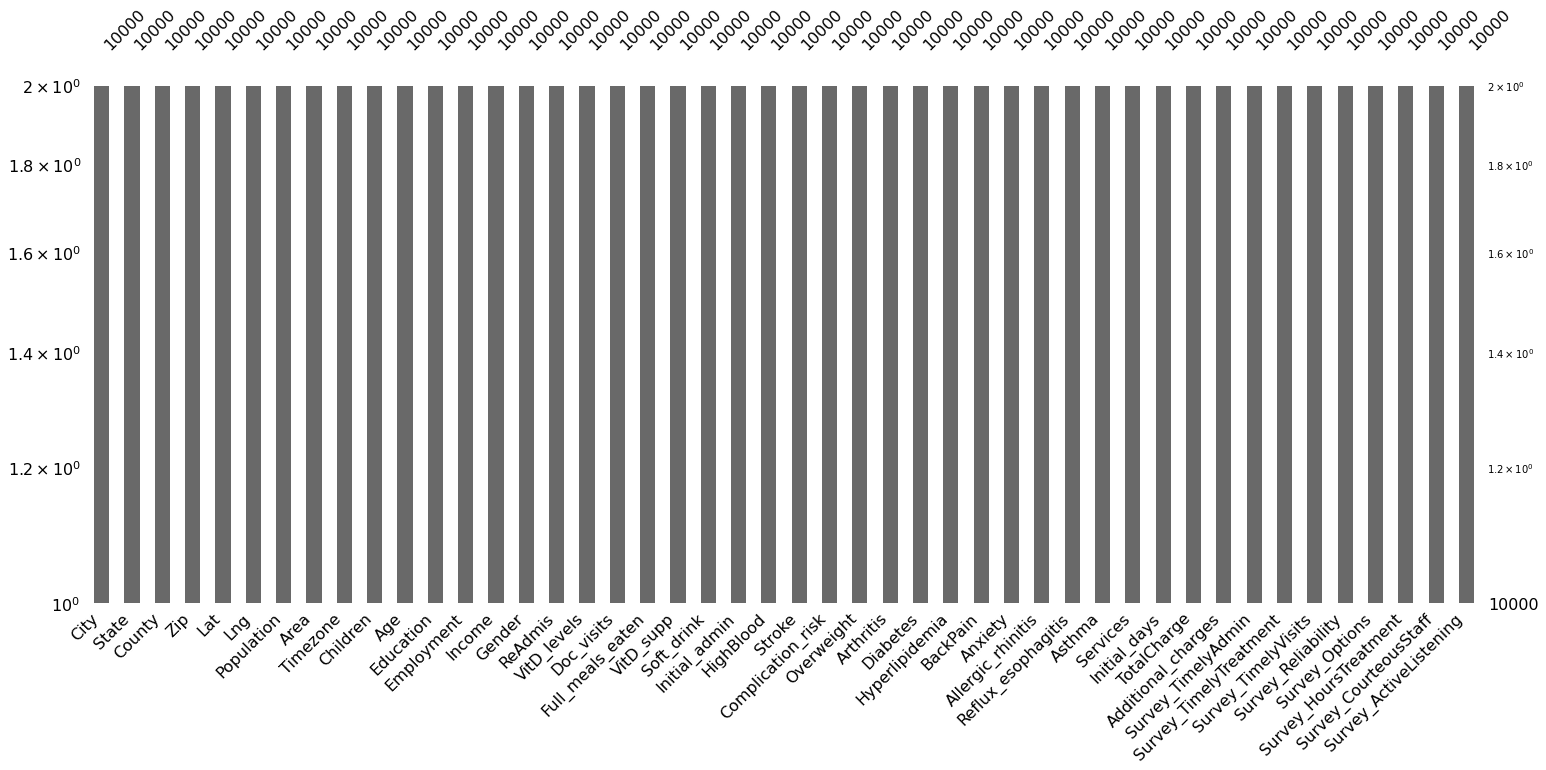

In [41]:
msno.bar(df_stats, log=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

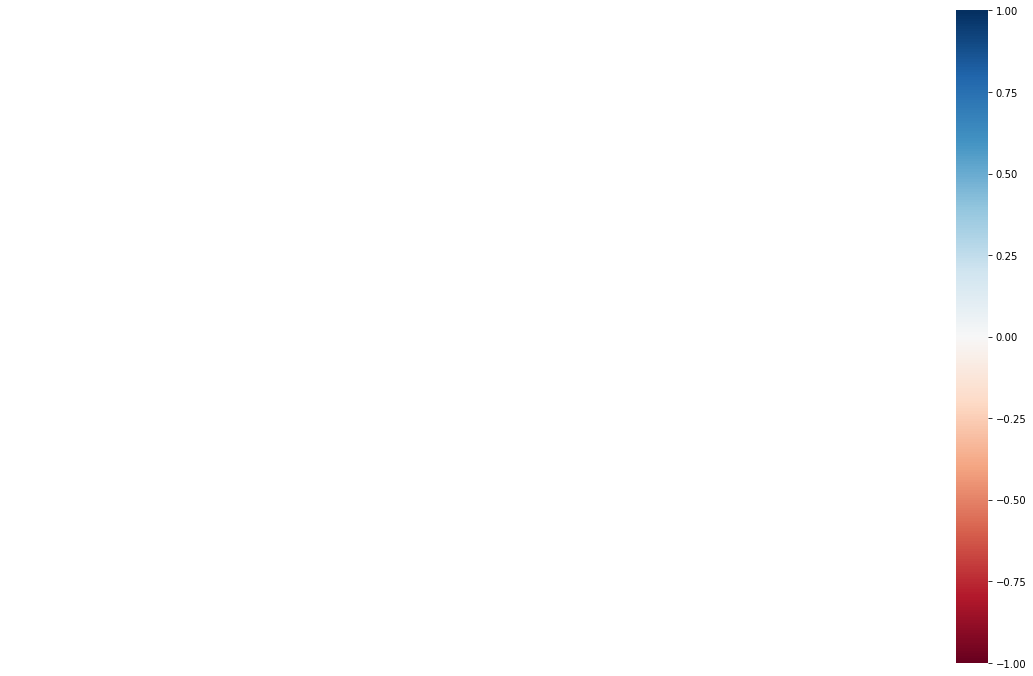

In [42]:
msno.heatmap(df_stats)

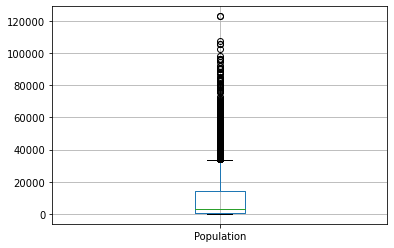

In [43]:
# Identify outliers
df_stats.boxplot(['Population'])
plt.savefig('uc_pyplot.jpg')

In [44]:
df_stats['Population'] = (df_stats['Population'] - df_stats['Population'].mean()) / df_stats['Population'].std()
print(df['Population'])

1         2951
2        11303
3        17125
4         2162
5         5287
         ...  
9996      4762
9997      1251
9998       532
9999       271
10000    41524
Name: Population, Length: 10000, dtype: int64


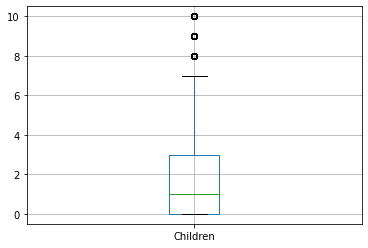

In [45]:
df_stats.boxplot(['Children'])
plt.savefig('uc_pyplot.jpg')

In [46]:
data = (df_stats['Children'] - df_stats['Children'].mean()) / np.std(df_stats['Children'])
data

1       -0.268130
2        0.697755
3        0.697755
4       -0.751072
5       -0.751072
           ...   
9996    -0.751072
9997     1.180697
9998     0.697755
9999     0.697755
10000    3.112467
Name: Children, Length: 10000, dtype: float64

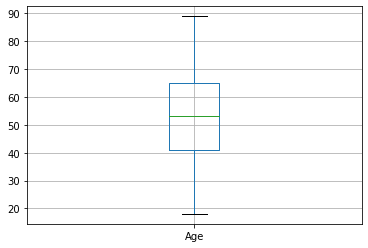

In [47]:
df_stats.boxplot(['Age'])
plt.savefig('uc_pyplot.jpg')

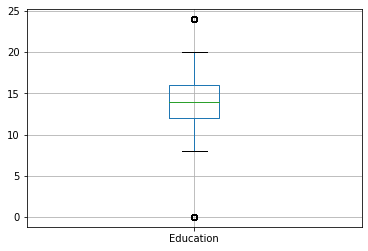

In [48]:
df_stats.boxplot(['Education'])
plt.savefig('uc_pyplot.jpg')

In [49]:
df_stats['Education'] = (df_stats['Education'] - df_stats['Education'].mean()) / df_stats['Education'].std()
print(df_stats['Education'])

1       -0.197079
2        0.126479
3        0.126479
4       -0.520637
5       -0.520637
           ...   
9996     0.773594
9997    -0.520637
9998    -0.520637
9999     0.773594
10000   -0.520637
Name: Education, Length: 10000, dtype: float64


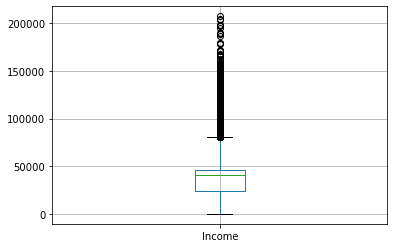

In [50]:
df_stats.boxplot(['Income'])
plt.savefig('uc_pyplot.jpg')

In [51]:
z = (df_stats['Income'] - df_stats['Income'].mean()) / df_stats['Income'].std()
data = df_stats.loc[(z > 3) | (z < -3)]['Income']
data

31      167105.10
37      122615.82
59      132963.95
64      128855.39
78      135288.23
          ...    
9743    153662.04
9863    121276.57
9907    138512.91
9911    119679.13
9956    122291.51
Name: Income, Length: 173, dtype: float64

In [52]:
df_stats['Income'] = (df_stats['Income'] - df_stats['Income'].mean()) / df_stats['Income'].std()
print(df_stats['Income'])

1        1.852284
2        0.254045
3       -1.049458
4       -0.029857
5       -1.578344
           ...   
9996     0.220353
9997    -1.024828
9998     1.022094
9999    -0.433302
10000    0.892081
Name: Income, Length: 10000, dtype: float64


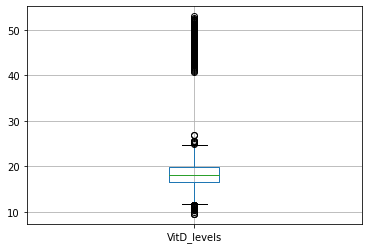

In [53]:
df_stats.boxplot(['VitD_levels'])
plt.savefig('uc_pyplot.jpg')

In [54]:
print(1-cosine(df_stats['VitD_levels'], df_stats['VitD_supp']))

0.5092760439735684


In [55]:
high_VitD = np.where((df_stats['VitD_levels']>30) & (df_stats['VitD_supp']>1))
high_VitD

(array([  94,  837, 1069, 1082, 1379, 1445, 1812, 1972, 2089, 2344, 2372,
        2495, 2669, 3042, 3713, 4002, 4028, 4199, 4596, 4716, 4776, 4890,
        5044, 5128, 5907, 6216, 6560, 6938, 7185, 8088, 8156, 8410, 8744,
        8872, 9095, 9172, 9260, 9263, 9365, 9459, 9483, 9503, 9790, 9933]),)

In [56]:
print(1-cosine(df_stats['Age'], df_stats['Overweight']))

0.8086840545032804


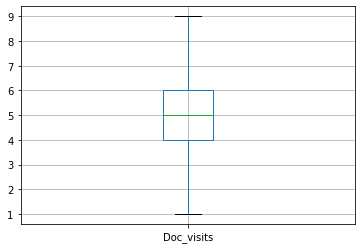

In [57]:
df.boxplot(['Doc_visits'])
plt.savefig('uc_pyplot.jpg')

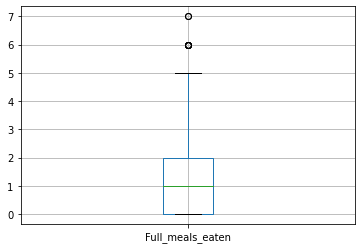

In [58]:
df.boxplot(['Full_meals_eaten'])
plt.savefig('uc_pyplot.jpg')

In [59]:
z = (df_stats['Full_meals_eaten'] - df_stats['Full_meals_eaten'].mean()) / df_stats['Full_meals_eaten'].std()
data = df_stats.loc[(z > 3) | (z < -3)]['Full_meals_eaten']
data.mean()

5.303030303030303

In [60]:
df_stats['Full_meals_eaten'] = (df_stats['Full_meals_eaten'] - df_stats['Full_meals_eaten'].mean()) / df_stats['Full_meals_eaten'].std()
df_stats['Full_meals_eaten']

1       -0.993337
2        0.990560
3       -0.001389
4       -0.001389
5       -0.993337
           ...   
9996     0.990560
9997    -0.993337
9998     0.990560
9999     0.990560
10000   -0.993337
Name: Full_meals_eaten, Length: 10000, dtype: float64

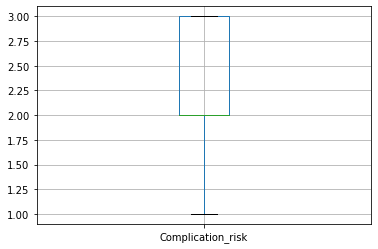

In [61]:
df_stats.boxplot(['Complication_risk'])
plt.savefig('uc_pyplot.jpg')

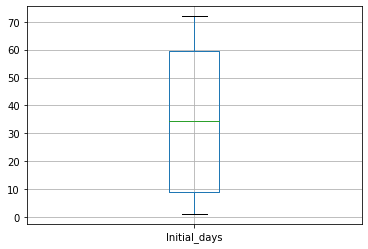

In [62]:
df_stats.boxplot(['Initial_days'])
plt.savefig('uc_pyplot.jpg')

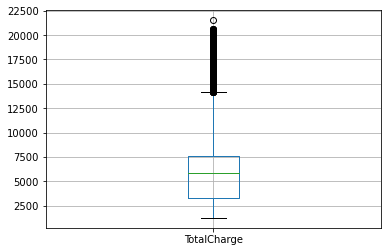

In [63]:
df_stats.boxplot(['TotalCharge'])
plt.savefig('uc_pyplot.jpg')

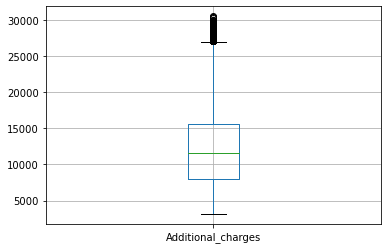

In [64]:
df_stats.boxplot(['Additional_charges'])
plt.savefig('uc_pyplot.jpg')

In [65]:
df_stats['Additional_charges'] = (df_stats['Additional_charges'] - df_stats['Additional_charges'].mean()) / df_stats['Additional_charges'].std()
df_stats['Additional_charges']

1        0.764967
2        0.715078
3        0.698600
4        0.009004
5       -1.408920
           ...   
9996    -0.612430
9997     2.380188
9998     0.358678
9999    -0.787584
10000   -0.197374
Name: Additional_charges, Length: 10000, dtype: float64

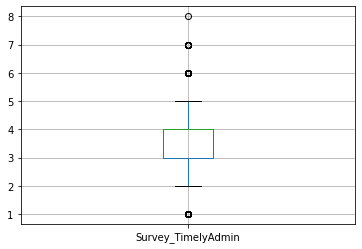

In [66]:
df_stats.boxplot(['Survey_TimelyAdmin'])
plt.savefig('uc_pyplot.jpg')

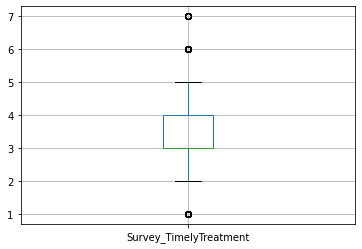

In [67]:
df_stats.boxplot(['Survey_TimelyTreatment'])
plt.savefig('uc_pyplot.jpg')

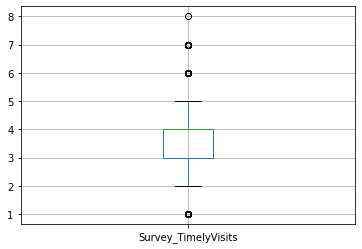

In [68]:
df_stats.boxplot(['Survey_TimelyVisits'])
plt.savefig('uc_pyplot.jpg')

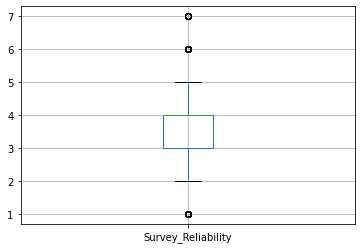

In [69]:
df_stats.boxplot(['Survey_Reliability'])
plt.savefig('uc_pyplot.jpg')

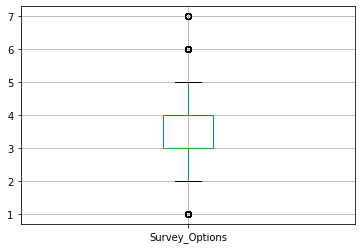

In [70]:
df_stats.boxplot(['Survey_Options'])
plt.savefig('uc_pyplot.jpg')

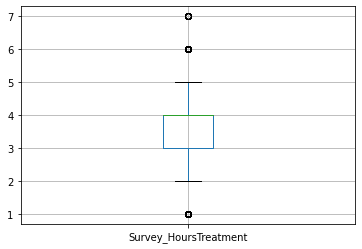

In [71]:
df_stats.boxplot(['Survey_HoursTreatment'])
plt.savefig('uc_pyplot.jpg')

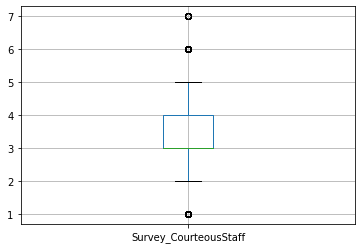

In [72]:
df_stats.boxplot(['Survey_CourteousStaff'])
plt.savefig('uc_pyplot.jpg')

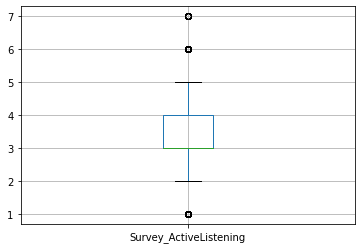

In [73]:
df_stats.boxplot(['Survey_ActiveListening'])
plt.savefig('uc_pyplot.jpg')

In [74]:
z = (df_stats['Survey_TimelyAdmin'] - df_stats['Survey_TimelyAdmin'].mean()) / df_stats['Survey_TimelyAdmin'].std()
z.mean()

-2.415401212374491e-16

In [75]:
z = (df_stats['Survey_TimelyTreatment'] - df_stats['Survey_TimelyTreatment'].mean()) / df_stats['Survey_TimelyTreatment'].std()
z.mean()

-3.064215547965432e-18

In [76]:
z = (df_stats['Survey_TimelyVisits'] - df_stats['Survey_TimelyVisits'].mean()) / df_stats['Survey_TimelyVisits'].std()
z.mean()

-1.3541390231353034e-16

In [77]:
z = (df_stats['Survey_Reliability'] - df_stats['Survey_Reliability'].mean()) / df_stats['Survey_Reliability'].std()
z.mean()

3.177458296477198e-16

In [78]:
z = (df_stats['Survey_Options'] - df_stats['Survey_Options'].mean()) / df_stats['Survey_Options'].std()
z.mean()

-2.8798075035751937e-16

In [79]:
z = (df_stats['Survey_CourteousStaff'] - df_stats['Survey_CourteousStaff'].mean()) / df_stats['Survey_CourteousStaff'].std()
z.mean()

2.117972464077411e-16

In [80]:
z = (df_stats['Survey_HoursTreatment'] - df_stats['Survey_HoursTreatment'].mean()) / df_stats['Survey_HoursTreatment'].std()
z.mean()

7.278622149442526e-17

In [81]:
z = (df_stats['Survey_ActiveListening'] - df_stats['Survey_ActiveListening'].mean()) / df_stats['Survey_ActiveListening'].std()
z.mean()

4.779732165616224e-16

In [82]:
df_stats.head(5)

,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Children,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
1,Eva,1,Morgan,35621,34.34960,-86.72508,-0.473145,2,-6,1.0,...,3191.048774,0.764967,3,3,2,2,4,3,3,4
2,Marianna,10,Jackson,32446,30.84513,-85.22907,0.090237,3,-6,3.0,...,4214.905346,0.715078,3,4,3,4,4,4,3,3
3,Sioux Falls,43,Minnehaha,57110,43.54321,-96.63772,0.482959,2,-6,3.0,...,2177.586768,0.698600,2,4,4,4,3,4,3,3
4,New Richland,24,Waseca,56072,43.89744,-93.51479,-0.526366,2,-6,0.0,...,2465.118965,0.009004,3,5,5,3,4,5,5,5
5,West Point,48,King William,23181,37.59894,-76.88958,-0.315570,1,-5,0.0,...,1885.655137,-1.408920,2,1,3,3,5,3,4,3


In [83]:
# Impute qualitive data fields by creating binary dummy columns
# Exclude redundant values: ex. gender is categorized as male or female, the value 'prefer not to answer' can be identified by both male and female being zero
dmy = pd.get_dummies(df_stats['Employment'])
df_stats = pd.concat([df_stats,dmy],axis=1)
df_stats = df_stats.drop(columns = "Employment")

In [84]:
dmy = pd.get_dummies(df_stats['Gender'])
dmy = dmy.iloc[:,:-1]
df_stats = pd.concat([df_stats,dmy],axis=1)
df_stats = df_stats.drop(columns = 'Gender')

In [85]:
dmy = pd.get_dummies(df_stats['Initial_admin'])
df_stats = pd.concat([df_stats,dmy],axis=1)
df_stats = df_stats.drop(columns = 'Initial_admin')

In [86]:
# Exlude target field, remaining qualitive fields and redundant fields 
df_numeric = df_stats.drop(columns = ['ReAdmis','City','County','State','Lat','Lng','Timezone'])
print(df_numeric.columns)

Index(['Zip', 'Population', 'Area', 'Children', 'Age', 'Education', 'Income',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp',
       'Soft_drink', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges',
       'Survey_TimelyAdmin', 'Survey_TimelyTreatment', 'Survey_TimelyVisits',
       'Survey_Reliability', 'Survey_Options', 'Survey_HoursTreatment',
       'Survey_CourteousStaff', 'Survey_ActiveListening', 'Full Time',
       'Part Time', 'Retired', 'Student', 'Unemployed', 'Female', 'Male',
       'Elective Admission', 'Emergency Admission', 'Observation Admission'],
      dtype='object')


In [87]:
# PCA analysis
# Normalize the data and select the number of components to extract
data_norm = (df_numeric - df_numeric.mean()) / df_numeric.std()
pca = PCA(n_components=df_numeric.shape[1])

In [88]:
# Create a list of PCA names
pcs_names = [] 
for i, col in enumerate(df_numeric.columns): 
    pcs_names.append('PC' + str(i+1)) 
print(pcs_names)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46']


In [89]:
# Use PCA application to convert variables to components
pca.fit(data_norm)
medical_pca = pd.DataFrame(pca.transform(data_norm),columns = pcs_names)

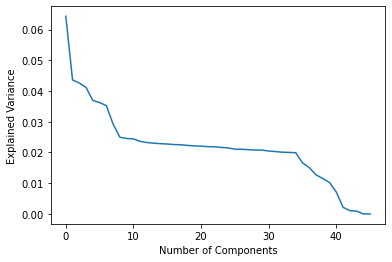

In [90]:
# Scree plt for PCA
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show();

In [91]:
# Extract the eigenvalues
cov_matrix = np.dot(data_norm.T, data_norm) / df_numeric.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

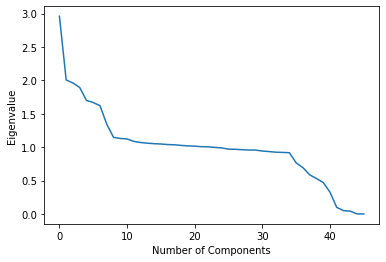

In [92]:
# Scree plot for eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show();

In [93]:
# Select the fewest components
for pc, var in zip(pcs_names, np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

PC1 0.06434887178807758
PC2 0.10795543420844111
PC3 0.15057259981512075
PC4 0.1917314278236822
PC5 0.22867159792901193
PC6 0.26492591604761223
PC7 0.3001587315951259
PC8 0.32936216241097965
PC9 0.35429538492571633
PC10 0.37885628389223086
PC11 0.40326642153311376
PC12 0.42687706783305635
PC13 0.45011850394954056
PC14 0.47314327174220083
PC15 0.4960087771011492
PC16 0.5187669541246134
PC17 0.5413482646238481
PC18 0.5638532201021941
PC19 0.5861541579723284
PC20 0.6082999342586124
PC21 0.6303605893179742
PC22 0.6522542205201695
PC23 0.674094747864526
PC24 0.6957444683639845
PC25 0.7172304720740028
PC26 0.7383156936864255
PC27 0.759351658931144
PC28 0.7802645333911442
PC29 0.8010628914680042
PC30 0.8218489006602759
PC31 0.8423188653549486
PC32 0.8626156300749974
PC33 0.8827122948377153
PC34 0.9027322843435649
PC35 0.9226491124451223
PC36 0.9392661957140251
PC37 0.9543370152978192
PC38 0.9670668546583991
PC39 0.9785817653704805
PC40 0.9888006798412153
PC41 0.9958974783466501
PC42 0.99802202

In [94]:
# Create a rotation
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = df_numeric.columns)
print(rotation)

                             PC1       PC2       PC3       PC4       PC5  \
Zip                     0.006944 -0.001683  0.010453  0.001572 -0.003455   
Population             -0.010544  0.018319 -0.000059  0.015566  0.015860   
Area                    0.003011  0.019498  0.025447  0.011031  0.009498   
Children               -0.001914 -0.002015  0.009142 -0.007864  0.024458   
Age                     0.000208  0.170151  0.204727 -0.398495 -0.010920   
Education               0.004284  0.000806 -0.013959  0.014856  0.015679   
Income                  0.002405  0.002612 -0.016295 -0.005645 -0.042982   
VitD_levels             0.008969  0.383699  0.239779  0.278228 -0.039034   
Doc_visits             -0.007130 -0.004302  0.013517 -0.012523 -0.009137   
Full_meals_eaten        0.000467  0.014302 -0.010680 -0.033090  0.031515   
VitD_supp               0.004713  0.036825  0.003260  0.001459 -0.003853   
Soft_drink             -0.006803 -0.001713  0.007251  0.002288  0.045423   
HighBlood   

In [95]:
# Outputs of components
loadings = pd.DataFrame(pca.components_.T, columns = pcs_names,index = df_numeric.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
Zip,0.006944,-0.001683,0.010453,0.001572,-0.003455,-0.012596,0.009333,0.059351,0.066516,0.178117,...,0.009192,-0.013716,-0.012369,-0.004185,-0.001396,0.001417,0.000704,-0.000445,-4.903664e-18,0.000000e+00
Population,-0.010544,0.018319,-0.000059,0.015566,0.015860,0.006873,0.020359,-0.059827,0.003819,0.162159,...,0.027364,-0.006175,-0.024810,-0.022547,-0.004140,-0.002259,-0.002361,-0.002281,-5.083425e-17,7.316821e-17
Area,0.003011,0.019498,0.025447,0.011031,0.009498,-0.001183,-0.004759,0.038216,-0.073377,0.200484,...,-0.045403,-0.022670,0.042327,-0.018165,-0.000241,-0.010900,-0.005845,-0.002190,1.722583e-17,8.185689e-17
Children,-0.001914,-0.002015,0.009142,-0.007864,0.024458,-0.006855,0.015713,0.020476,0.016248,0.124182,...,-0.007189,0.020237,-0.016358,-0.017564,-0.001387,0.002235,-0.001483,-0.001480,-1.754927e-16,-1.105808e-16
Age,0.000208,0.170151,0.204727,-0.398495,-0.010920,-0.050113,0.053317,-0.015178,0.110499,-0.096027,...,-0.011926,0.011913,-0.000832,-0.002086,0.004526,0.485403,-0.000967,0.004896,-1.168404e-16,-8.450705e-17
Education,0.004284,0.000806,-0.013959,0.014856,0.015679,0.006920,0.007269,0.031122,0.208340,0.081687,...,-0.003490,-0.001700,0.011561,-0.015615,-0.012168,0.001118,-0.003842,0.000695,7.415577e-17,1.125147e-17
Income,0.002405,0.002612,-0.016295,-0.005645,-0.042982,-0.018745,0.003599,0.014554,-0.040970,0.111092,...,-0.012756,-0.007550,0.003665,-0.001893,-0.003269,-0.000517,-0.000240,-0.002499,-1.604850e-16,-2.881594e-16
VitD_levels,0.008969,0.383699,0.239779,0.278228,-0.039034,-0.029028,0.090942,0.038124,-0.018706,-0.081250,...,-0.007563,-0.006145,-0.011059,0.009960,0.011257,-0.002607,0.541014,-0.036120,-1.220036e-16,-1.849225e-16
Doc_visits,-0.007130,-0.004302,0.013517,-0.012523,-0.009137,0.025754,-0.003204,0.073245,0.075136,0.045676,...,0.024842,-0.023091,0.008527,-0.007238,-0.000975,-0.000550,-0.000711,0.000224,1.077925e-16,3.010835e-16
Full_meals_eaten,0.000467,0.014302,-0.010680,-0.033090,0.031515,-0.023808,-0.000522,0.050491,0.031727,-0.118532,...,0.032440,-0.014501,-0.000868,0.014868,0.001172,-0.000157,-0.002428,0.000888,-1.576293e-17,-1.930275e-16


In [96]:
# Extract reduced dataset and print
medical_reduced = medical_pca.iloc[ : , 0:3]
print(medical_reduced)

           PC1       PC2       PC3
0     1.555429  0.600215 -1.015412
1     0.350520 -0.889092  1.343255
2     0.236100 -1.646615  0.653577
3    -2.352985 -0.104929 -1.875978
4     2.431364 -2.912325 -0.953335
...        ...       ...       ...
9995  2.036910  1.033226 -1.080176
9996  0.771279  2.470258  0.012432
9997  1.916401 -0.604135  1.064580
9998 -0.841379  1.366140 -1.105025
9999 -0.612978 -0.148320  1.276939

[10000 rows x 3 columns]
